## PowerSpec diags

- Notebook testing with an example how to use PowerSpec (from AJ) to compute and plot a space power spectrum from MEDWEST60 ensemble simulations 
(on SSH)

- Left to do:
    * see how to add reference slope on plot.
    * compute ensemble mean sp and plot on top of individual sp.

# Load packages

In [1]:
## standart libraries
import os,sys
import numpy as np

from scipy.signal import argrelmax
from scipy.stats import linregress

# xarray
import xarray as xr

# plot
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cmocean

# custom tools
import lib_medwest60 as slx

%matplotlib inline 

In [2]:
# Adekunle's PowerSPec module: https://github.com/adeajayi-kunle/PowerSpec
import sys
sys.path.insert(0,'/home/lerouste/DEVGIT/PowerSpec/powerspec')
import powerspec as ps
#import Plot_PowerSpec as pp

## Read data (ensemble experiments)

In [6]:
varna="sossheig"
typ="gridT-2D"
naexp="STD1%"
CONFIGCASE='MEDWEST60-GSL15'
ens='ens01'
machine='CAL1'
nav_lat_ref,nav_lon_ref,mask,ssh00,varname,latexvarname=slx.readallmbs(machine=machine,NMBtot=2,typ=typ,varna=varna,CONFIGCASEmed=CONFIGCASE,ens=ens)
ssh00.attrs['experiment_short_name'] =  naexp
maskmap = mask.isel(z=0).squeeze()
maskref=maskmap

/mnt/meom/workdir/lerouste/MEDWEST60/MEDWEST60-GSL15-S/ens01/1h/gridT-2D/
001MEDWEST60-GSL15-ens01_1h_*gridT-2D_*.nc
/mnt/meom/workdir/lerouste/MEDWEST60/MEDWEST60-GSL15-S/ens01/1h/gridT-2D/
002MEDWEST60-GSL15-ens01_1h_*gridT-2D_*.nc


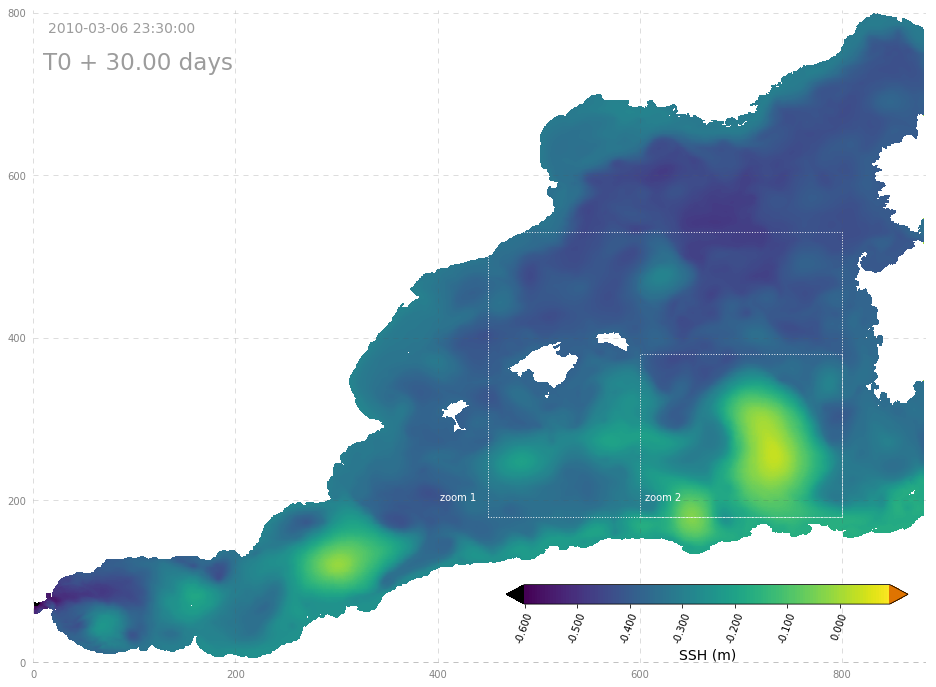

In [80]:


gstyle='lightstyle'
varname='SSH'
latexvarname=slx.flatexvarname(varna)[1]
plto = varname+"_"+CONFIGCASE+"-"+ens+"ssh"    

diro='/mnt/meom/workdir/lerouste/MEDWEST60/DIAGS/'

#### for it in range(0,SSH_el.time_counter.size-1):
#for it in range(10,11,6):
for it in range(719,720,6):  
#for it in range(100,359,6): 
    #====================================
    # data to plot 
    tdate=ssh00.time_counter.to_index()[it]
    iday = (it+1)/24.
    tdelta="T0 + "+str('%.2f'%(iday))+" days"
    tformat="%.3f"
    
    # multiplicating factor
    fac=1

    if fac==1e3:
        faclabel='1e3'
        faclabelinv='10$^{-3}$'

    if fac==1:
        faclabel='1'
        faclabelinv=''

    if fac==1e2:
        faclabel='1e2'
        faclabelinv='10$^{-2}$'
        
    data2plot = ssh00.isel(time_counter=it,e=0).squeeze().where(maskmap>0).to_masked_array()
    data2plot = data2plot*fac                 
    
    
    namo = plto+'_'+str(it)+'.png'


    #========= Plot settings ===============
    levbounds=[-0.6,0.1,0.005]
    
    # customed colormap
    cmap,norm = slx.mycolormap(levbounds,cm_base='viridis',cu='k',co='#DF7401')
    #cmocean.cm.thermal_r


    #========= PLOT ===============
    fig3,(ax) = plt.subplots(1, 1, figsize=[16, 12],facecolor='w')

    # main plot
    cs,ax = slx.plotmapMEDWEST_gp(fig3,ax,data2plot,cmap,norm,plto=plto,gridpts=True,gridptsgrid=True,gstyle=gstyle)
    #cs2   = ax.pcolormesh(data2plot2,cmap=cmap2,norm=norm2)
    lalpha=0.2
    lwidthgrid=1.
    gridinc=200
    lstylegrid=(0, (5, 5))
    if (gstyle=='lightstyle'):
            cmap.set_bad('w')
            lcolorgrid="#585858" # "#D8D8D8"
            tcolorgrid='#848484'#"#848484"            

    #ax = plt.gca()
    ax.xaxis.set_major_locator(mticker.MultipleLocator(gridinc))
    ax.yaxis.set_major_locator(mticker.MultipleLocator(gridinc))   
    ax.tick_params(axis='x', colors=tcolorgrid)
    ax.tick_params(axis='y', colors=tcolorgrid)
    ax.grid(which='major',linestyle=lstylegrid,color=lcolorgrid,alpha=lalpha,linewidth=lwidthgrid)
    ax.axhline(y=1.,xmin=0, xmax=883,zorder=10,color=lcolorgrid,linewidth=lwidthgrid,linestyle=lstylegrid,alpha=lalpha )
    
    # add date
    tcolordate="848484"
    tsizedate=14
    
    ax.annotate(tdate,xy=(15,775),xycoords='data', color=tcolordate,size=tsizedate)
    plt.axhline(y=350.,xmin=200, xmax=400,zorder=10,color='r',linewidth=3,linestyle='-',alpha=1 )
    #plt.annotate(tdelta,xy=(15,750),xycoords='data', color=tcolordate,size=tsizedate)
    plt.annotate(tdelta,xy=(10,730),xycoords='data', color=tcolordate,size=23)
       
    
    # add colorbar
    cbon=True
    if cbon:
        tlabel=latexvarname+slx.textunitfac(varname,faclabelinv)
        cb = slx.addcolorbar(fig3,cs,ax,levbounds,levincr=20,tformat="%.3f",
                             tlabel=tlabel,facmul=1,orientation='horizontal',tc='k',
                            bbta=(0.08, -0.08,0.9,0.2))
    
    showzoom1=True
    if showzoom1:
        region=Lregion
        xbox=[region[0],region[0],region[1],region[1],region[0]]
        ybox=[region[2],region[3],region[3],region[2],region[2]]
        ax.plot(xbox, ybox, color='w', alpha=0.9,linewidth=1, linestyle=":",solid_capstyle='round', zorder=2)
        ax.annotate("zoom 1",xy=(402,200),xycoords='data', color="w",size=10)

    showzoom2=True
    if showzoom2:
        region=region3
        xbox=[region[0],region[0],region[1],region[1],region[0]]
        ybox=[region[2],region[3],region[3],region[2],region[2]]
        ax.plot(xbox, ybox, color='w', alpha=0.9,linewidth=1, linestyle=":",solid_capstyle='round', zorder=2)
        ax.annotate("zoom 2",xy=(605,200),xycoords='data', color="w",size=10)

        
    plt.show()
         
    # Save fig in png, resolution dpi    
    slx.saveplt(fig3,diro,namo,dpifig=300)
    plt.close(fig3)

## Define 4 regions of 200x200 gridpoints
See maps below

In [7]:
#region=[400,600,210,410]
Lregion=[450,800,180,530]

region1=[400,600,210,410]

region2=[600,800,410,610]

region3=[600,800,180,380]

## Compute and plot power spectrum

* Select a (predefined) region

In [8]:
region=Lregion
sshensreg = ssh00.isel(x=slice(region[0],region[1]),y=slice(region[2],region[3]))
nav_lon = nav_lon_ref.isel(x=slice(region[0],region[1]),y=slice(region[2],region[3]))
nav_lat = nav_lat_ref.isel(x=slice(region[0],region[1]),y=slice(region[2],region[3]))
maskreg = maskref.isel(x=slice(region[0],region[1]),y=slice(region[2],region[3]))

In [82]:
sshensreg

<xarray.DataArray 'sossheig' (e: 2, time_counter: 720, y: 350, x: 350)>
dask.array<shape=(2, 720, 350, 350), dtype=float32, chunksize=(1, 24, 350, 350)>
Coordinates:
    nav_lat        (y, x) float32 37.2955 37.2952 37.2949 37.2946 37.2943 ...
    nav_lon        (y, x) float32 1.88484 1.90155 1.91827 1.93498 1.95169 ...
    time_centered  (time_counter) datetime64[ns] 2010-02-05T00:30:00 ...
  * time_counter   (time_counter) datetime64[ns] 2010-02-05T00:30:00 ...
Dimensions without coordinates: e, y, x
Attributes:
    standard_name:       sea_surface_height_above_geoid
    long_name:           sea surface height
    units:               m
    online_operation:    average
    interval_operation:  80 s
    interval_write:      1 h
    cell_methods:        time: mean (interval: 80 s)

* compute power spectrum and plot for a given region

In [31]:
diro='/mnt/meom/workdir/lerouste/MEDWEST60/DIAGS/'

# spectrum of all members at several time step 

at 0, 5 10 15 20 25 30 days 

--------0
--------119


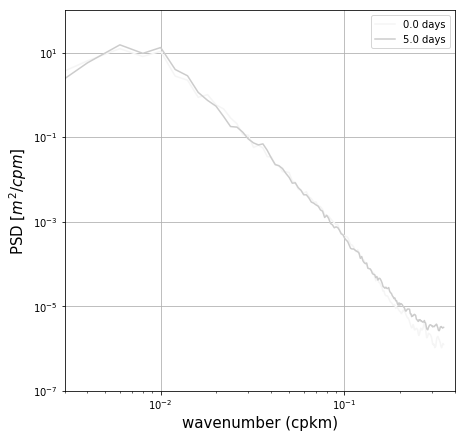

NameError: name 'diro' is not defined

In [9]:
reg='Lregion'
plto='SP_'+CONFIGCASE+'-'+ens+'_'+reg
dpifig=300

icount=-1
for itt in range(0,24*5*2,24*5):
    it =itt-1
    if it<0:
        it=0
    icount = icount+1
    print('--------'+str(it))
    # - compute daily spectra then computer average
    _psd = []
    ssh=sshensreg[:,it:it+2,:,:].where(maskreg>0).squeeze()
    
    for k in range(len(ssh)):
        wavenumber,psd_ = ps.wavenumber_spectra(ssh[k].to_masked_array(),nav_lon.values,nav_lat.values)
        _psd.append(psd_)
    psd = np.array(_psd).mean(axis=0)
    

    if icount==0:
        allpsd = xr.DataArray(psd,dims=('wn'),name='psd')
        fig3 = plt.figure(figsize=([7,7]),facecolor='white')
        
    else:
        xrpsd  = xr.DataArray(psd,dims=('wn'),name='psd')
        allpsd = xr.concat([allpsd,xrpsd], dim='time_counter')

 
    co=((720-it)/750., (720-it)/750., (720-it)/750.)
    plt.loglog(1E3*wavenumber,psd,color=co,label=str(itt/24.)+" days")

plt.xlim(3e-3,4e-1)
plt.ylim(1e-7,1e2)
plt.xlabel('wavenumber (cpkm)',fontsize=15)
plt.ylabel('PSD '+r'[$m^2/cpm$]',fontsize=15)
plt.grid(True)   
plt.legend()
plt.show()


# Save fig in png, resolution dpi    
slx.saveplt(fig3,diro,plto,dpifig=300)

savedata=True
if savedata:
    dataprint = xr.DataArray(allpsd.values, dims=('time_counter', 'wn'),coords={'time_counter':[0,5,10,15,20,25,30]})

    outfi = diro+'SP_'+CONFIGCASE+'-'+ens+'_'+reg

    dataprint.name = 'psd'
    dataprint.attrs['long_name'] =  "psd"
    dataprint.to_netcdf(outfi,mode='w')

        

# sp diff

Compute the difference of all members to member 1.

Then compute the psd of the diff at different times.

And plot and save.

In [126]:
sshdiff = sshensreg-sshensreg.isel(e=0)
sshdiff.load()

<xarray.DataArray 'sossheig' (e: 2, time_counter: 720, y: 350, x: 350)>
array([[[[ -2.815723e-04, ...,   2.586246e-03],
         ..., 
         [  0.000000e+00, ...,  -1.021713e-03]],

        ..., 
        [[ -1.775026e-04, ...,   7.060458e-02],
         ..., 
         [  0.000000e+00, ...,   8.815527e-05]]],


       [[[  0.000000e+00, ...,   0.000000e+00],
         ..., 
         [  0.000000e+00, ...,   0.000000e+00]],

        ..., 
        [[  0.000000e+00, ...,   0.000000e+00],
         ..., 
         [  0.000000e+00, ...,   0.000000e+00]]]], dtype=float32)
Coordinates:
    nav_lat        (y, x) float32 37.2955 37.2952 37.2949 37.2946 37.2943 ...
    nav_lon        (y, x) float32 1.88484 1.90155 1.91827 1.93498 1.95169 ...
    time_centered  (time_counter) datetime64[ns] 2010-02-05T00:30:00 ...
  * time_counter   (time_counter) datetime64[ns] 2010-02-05T00:30:00 ...
Dimensions without coordinates: e, y, x

--------0
--------119
--------239
--------359
--------479
--------599
--------719


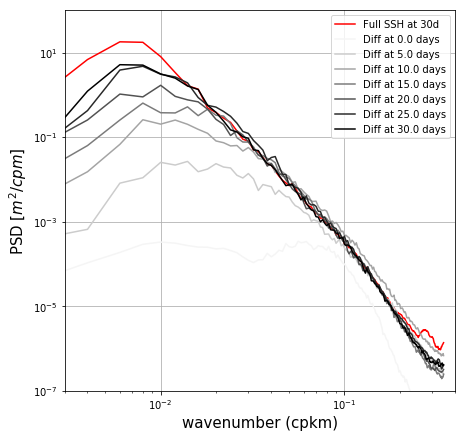

In [155]:
reg='Lregion'
plto='SPdiff_'+CONFIGCASE+'-'+ens+'_'+reg
dpifig=300


icount=-1
for itt in range(0,721,24*5):
    it =itt-1
    if it<0:
        it=0
    icount = icount+1
    print('--------'+str(it))
    # - compute daily spectra then computer average
    _psd = []
    ssh=sshdiff[:,it,:,:].where(maskreg>0) #.squeeze()
    
    for k in range(len(ssh)):
        wavenumber,psd_ = ps.wavenumber_spectra(ssh[k].to_masked_array(),nav_lon.values,nav_lat.values)
        _psd.append(psd_)
    psd = np.array(_psd).mean(axis=0)
    if icount==0:
        fig3 = plt.figure(figsize=([7,7]),facecolor='white')
        plt.loglog(1E3*wavenumber,psd30d,color='r',label="Full SSH at 30d")
        allpsd_diff = xr.DataArray(psd,dims=('wn'),name='psd')
        
        
    else:
        xrpsd  = xr.DataArray(psd,dims=('wn'),name='psd')
        allpsd_diff = xr.concat([allpsd_diff,xrpsd], dim='time_counter')
       

 
    co=((720-it)/750., (720-it)/750., (720-it)/750.)
    plt.loglog(1E3*wavenumber,psd,color=co,label="Diff at "+str(itt/24.)+" days")

plt.xlim(3e-3,4e-1)
plt.ylim(1e-7,1e2)
plt.xlabel('wavenumber (cpkm)',fontsize=15)
plt.ylabel('PSD '+r'[$m^2/cpm$]',fontsize=15)
plt.grid(True)   
plt.legend()
plt.show()


# Save fig in png, resolution dpi    
slx.saveplt(fig3,diro,plto,dpifig=300)
        

savedata=True
if savedata:
    dataprint = xr.DataArray(allpsd_diff.values, dims=('time_counter', 'wn'),coords={'time_counter':[0,5,10,15,20,25,30]})

    outfi = diro+'SPdiff_'+CONFIGCASE+'-'+ens+'_'+reg

    dataprint.name = 'psd'
    dataprint.attrs['long_name'] =  "psd_of_difference"
    dataprint.to_netcdf(outfi,mode='w')


---

## Test of the interp function over Balearic islands

* select the region (200x200)

In [43]:
region=region1
sshensreg = ssh00.isel(x=slice(region[0],region[1]),y=slice(region[2],region[3]))
nav_lon = nav_lon_ref.isel(x=slice(region[0],region[1]),y=slice(region[2],region[3]))
nav_lat = nav_lat_ref.isel(x=slice(region[0],region[1]),y=slice(region[2],region[3]))

* Interpolate like done in powerspec

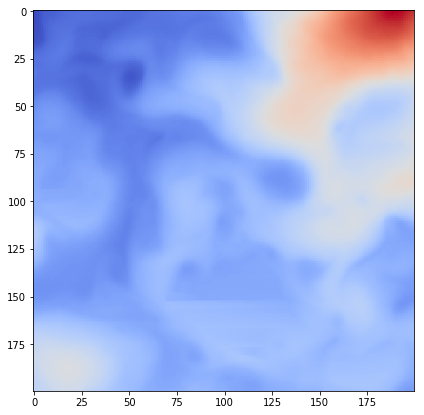

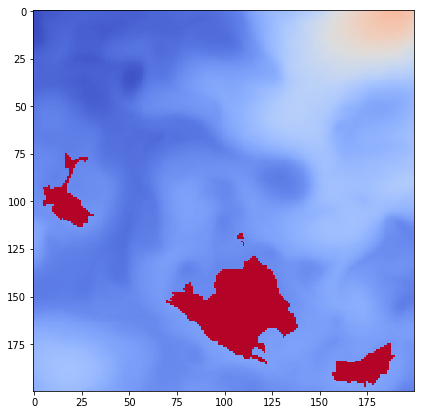

In [44]:
ssh=sshensreg[0,:,:,:]
x,y,data = ps.interpolate(ssh[0].where(ssh[0]!=0).to_masked_array(),nav_lon.values,nav_lat.values) 

data = ps.isdata_contain_nan(data)

fig = plt.figure(figsize=(7,7))
plt.imshow(data,cmap='coolwarm')
plt.show()
fig = plt.figure(figsize=(7,7))
plt.imshow(ssh[0],cmap='coolwarm')
plt.show()

---

In [ ]:
if len(ssh.shape)==4:
    kTOT=(ssh.shape[0]+ssh.shape[1])
    ssh2=ssh.stack(other=('e', 'time_counter'))
    ssh2
    
if len(ssh.shape)==3:
    kTOT=len(ssh)


for k in range(kTOT):
    if len(ssh.shape)==4:
        wavenumber,psd_ = ps.wavenumber_spectra(ssh.isel(et=k).to_masked_array(),nav_lon.values,nav_lat.values)
    else:
        wavenumber,psd_ = ps.wavenumber_spectra(ssh[k].to_masked_array(),nav_lon.values,nav_lat.values)       
    _psd.append(psd_)
psd = np.array(_psd).mean(axis=0)